In [1]:
import os
from pathlib import Path
from aocd.models import Puzzle
import collections
import numpy as np
import re
from statistics import median, mean
import math
import queue
import itertools
import more_itertools
infinite_defaultdict = lambda: collections.defaultdict(infinite_defaultdict)
from copy import copy
import functools
import heapq
import operator
from tqdm.notebook import trange, tqdm
import networkx as nx
import pprint
from PIL import Image, ImageDraw
import bisect
import scipy as sp
import matplotlib.pyplot as plt



# Day 1

In [2]:
puzzle = Puzzle(2024, 1)

In [3]:
data = [list(map(int, line.split("   "))) for line in puzzle.input_data.split("\n")]

## Part 1 

In [4]:
sorted_data = [sorted(ls) for ls in zip(*data)]
res_a = sum(abs(x - y) for x, y in zip(*sorted_data))

In [5]:
puzzle.answer_a = res_a

## Part 2

In [6]:
x_counted = collections.Counter(x for x, _ in data)
y_counted = collections.Counter(y for _, y in data)

In [7]:
res_b = sum(xk * xv * y_counted[xk] for xk, xv in x_counted.items())

In [8]:
puzzle.answer_b = res_b

# Day 2

In [9]:
puzzle = Puzzle(2024, 2)

In [10]:
data = [list(map(int, line.split(" "))) for line in puzzle.input_data.split("\n")]

In [11]:
data_test = """7 6 4 2 1
1 2 7 8 9
9 7 6 2 1
1 3 2 4 5
8 6 4 4 1
1 3 6 7 9"""

In [12]:
data_test = [list(map(int, line.split(" "))) for line in data_test.split("\n")]

In [13]:
data_test

[[7, 6, 4, 2, 1],
 [1, 2, 7, 8, 9],
 [9, 7, 6, 2, 1],
 [1, 3, 2, 4, 5],
 [8, 6, 4, 4, 1],
 [1, 3, 6, 7, 9]]

## Part 1 

In [14]:
def valid_ascend(seq):
    return all(a < b < a + 4 for a, b in itertools.pairwise(seq))

def valid_descend(seq):
    return all(a > b > a - 4 for a, b in itertools.pairwise(seq))
    
def valid_sequence(seq):
    return valid_ascend(seq) or valid_descend(seq)


In [15]:
res_a = sum(valid_sequence(sequence) for  sequence in data)
res_a

564

In [16]:
puzzle.answer_a = res_a

## Part 2

In [17]:
def valid_ascend_b(seq):
    for i, (a, b) in enumerate(itertools.pairwise(seq)):
        if not (a < b < a + 4):
            return False, i
    return True, len(seq)
            

def valid_descend_b(seq):
    for i, (a, b) in enumerate(itertools.pairwise(seq)):
        if not (a > b > a - 4):
            return False, i
    return True, len(seq)

def valid_sequence_b(sequence):
    valid, i = valid_ascend_b(sequence)
    if valid:
        return True

    for offset in range(2):
        valid, _ = valid_ascend_b(sequence[i - 1 + offset: i + offset] + sequence[i + 1 + offset:])
        if valid:
            return True

    valid, i = valid_descend_b(sequence)
    if valid:
        return True
        
    for offset in range(2):
        valid, _ = valid_descend_b(sequence[i - 1 + offset: i + offset] + sequence[i + 1 + offset:])
        if valid:
            return True
            
    return False
    

In [18]:
res_b = sum(valid_sequence_b(sequence) for sequence in data)
res_b

604

In [19]:
puzzle.answer_b = res_b

# Day 3

In [20]:
puzzle = Puzzle(2024, 3)

In [21]:
data_test = "xmul(2,4)%&mul[3,7]!@^do_not_mul(5,5)+mul(32,64]then(mul(11,8)mul(8,5))"

## Part 1 

In [22]:
mul_regex = re.compile("mul\((?P<X>\d{1,3}),(?P<Y>\d{1,3})\)")
def parse_mul(data):
    return sum(int(m["X"])*int(m["Y"]) for m in re.finditer(mul_regex, data))

In [23]:
res_a = parse_mul(puzzle.input_data)
res_a

175700056

In [24]:
puzzle.answer_a = res_a

## Part 2

In [25]:
remove_dont_regex = re.compile(r"don't\(\).*?(?=(do(n't)?\(\)|$))", re.S)

In [26]:
re.match(re.compile(".*"), "\n")

<re.Match object; span=(0, 0), match=''>

In [27]:
data_test = "don't()don't()bdon't()cdo()adon't()\ndo()ddodon't()d"

In [28]:
for m in re.finditer(remove_dont_regex, data_test):
    print(m.group())
    print()

don't()

don't()b

don't()c

don't()


don't()d



In [29]:
data_do = re.sub(remove_dont_regex, "", puzzle.input_data)

In [30]:
answer_b = parse_mul(data_do)
answer_b

71668682

In [31]:
puzzle.answer_b = answer_b

# Day 4

In [32]:
puzzle = Puzzle(2024, 4)

In [33]:
data_test = """MMMSXXMASM
MSAMXMSMSA
AMXSXMAAMM
MSAMASMSMX
XMASAMXAMM
XXAMMXXAMA
SMSMSASXSS
SAXAMASAAA
MAMMMXMMMM
MXMXAXMASX"""
grid_test = np.array([list(line) for line in data_test.split("\n")])
grid = np.array([list(line) for line in puzzle.input_data.split("\n")])

## Part 1 

In [34]:
def count_occurence(lst: list[str], word: str) -> int:
    lst_str = "".join(lst)
    # print(f"{lst_str:10} -> {word}: {lst_str.count(word)} {word[::-1]}: {lst_str.count(word[::-1])}")
    return lst_str.count(word) + lst_str.count(word[::-1])

In [35]:
def get_all_word_occurence(grid, word):
    occurences = 0
    x, y = grid.shape
    gird_sym = np.fliplr(grid)
    
    for xi in range(x):
        occurences += count_occurence(grid[xi, :], word)
    
    for yi in range(y):
        occurences += count_occurence(grid[:, yi], word)
    
    for di in range(-x + 1, y):
        occurences += count_occurence(grid.diagonal(di), word)
        occurences += count_occurence(gird_sym.diagonal(di), word)

    return occurences
        

In [36]:
get_all_word_occurence(grid_test, word)

NameError: name 'word' is not defined

In [ ]:
answer_a = get_all_word_occurence(grid, word)
answer_a

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
def get_x_mas_occurences(grid):
    occurences = 0
    x, y = grid.shape
    for xi in range(1, x - 1):
        for yi in range(1, y - 1):
            if grid[xi, yi] != "A":
                continue
            corner = f"{grid[xi-1, yi-1]}{grid[xi-1, yi+1]}{grid[xi+1, yi+1]}{grid[xi+1, yi-1]}"
            occurences += corner in ["SSMM", "SMMS", "MMSS", "MSSM"]

    return occurences

In [ ]:
get_x_mas_occurences(grid_test)

In [ ]:
answer_b = get_x_mas_occurences(grid)
answer_b

In [ ]:
puzzle.answer_b = answer_b

# Day 5

In [38]:
puzzle = Puzzle(2024, 5)

In [39]:
constraints, data = puzzle.input_data.split("\n\n")

In [40]:
input_data_test = """47|53
97|13
97|61
97|47
75|29
61|13
75|53
29|13
97|29
53|29
61|53
97|53
61|29
47|13
75|47
97|75
47|61
75|61
47|29
75|13
53|13

75,47,61,53,29
97,61,53,29,13
75,29,13
75,97,47,61,53
61,13,29
97,13,75,29,47
"""

## Part 1 

In [65]:
def parse_data_a(data_input):
    constraints, updates = data_input.split("\n\n")
    
    before_constraints = collections.defaultdict(set)
    
    for constraint in constraints.split():
        X, Y = map(int, constraint.split("|"))
        before_constraints[Y].add(X)

    counter_a = 0
    for update in updates.split():
        update_pages = list(map(int, update.split(",")))
        invalid_pages = set()
        for i, page in enumerate(update_pages):
            if page in invalid_pages:
                break
                
            invalid_pages.update(before_constraints[page])
        else:
            mid_element = update_pages[(len(update_pages) - 1)//2]
            counter_a += mid_element

    return counter_a

In [63]:
parse_data_a(input_data_test)

143

In [64]:
answer_a = parse_data_a(puzzle.input_data)
answer_a

4135

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [70]:
def parse_data_b(data_input):
    constraints, updates = data_input.split("\n\n")
    
    before_constraints = collections.defaultdict(set)
    after_constraints = collections.defaultdict(set)
    
    for constraint in constraints.split():
        X, Y = map(int, constraint.split("|"))
        before_constraints[Y].add(X)
        after_constraints[X].add(Y)

    invalid_updates = []
    for update in updates.split():
        update_pages = list(map(int, update.split(",")))
        invalid_pages = set()
        for i, page in enumerate(update_pages):
            if page in invalid_pages:
                invalid_updates.append(update_pages)
                break
                
            invalid_pages.update(before_constraints[page])
    
    counter_b = 0
    while invalid_updates:
        invalid_update = invalid_updates.pop()
        invalid_pages = set()
        for i, page in enumerate(invalid_update):
            if page in invalid_pages:
                for j, before_page in enumerate(invalid_update[:i]):
                    if before_page in after_constraints[page]:
                        new_update = invalid_update[:j] + [page] + invalid_update[j:i] + invalid_update[i+1:]
                        invalid_updates.append(new_update)
                        break
                break

            invalid_pages.update(before_constraints[page])
        else:
            mid_element = invalid_update[(len(invalid_update) - 1)//2]
            counter_b += mid_element
        
    return counter_b        

In [72]:
parse_data_b(input_data_test)

123

In [73]:
answer_b = parse_data_b(puzzle.input_data)
answer_b

5285

In [58]:
puzzle.answer_b = answer_b

That's the right answer!  You are one gold star closer to finding the Chief Historian.You have completed Day 5! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


# Day 6

In [2]:
puzzle = Puzzle(2024, 6)

In [3]:
data_test = """....#.....
.........#
..........
..#.......
.......#..
..........
.#..^.....
........#.
#.........
......#..."""

In [4]:
class Patrol:
    def __init__(self, input_data, time_parardox_position=None):
        self.obstruction_symbol = "#"
        self.visited_symbol = "X"
        self.time_parardox_symbol = "O"
        self.input_data = input_data
        self.time_parardox_position = time_parardox_position    
        self.data_map = self.init_data()
        if time_parardox_position is not None:
            self.data_map[time_parardox_position] = self.obstruction_symbol
        
        self.direction_map = self.data_map.copy()
        self.directions_mapping = {
            "<": (0, -1),
            "^": (-1, 0),
            ">": (0, 1),
            "V": (1, 0)
        }
        self.directions = [*self.directions_mapping]
        self.guard_direction = None
        self.guard_position = None

        self.starting_guard_position = self.find_guard_position()
        self.valid_time_paradox = self.move_guard()
        if time_parardox_position:
            self.data_map[time_parardox_position] = self.time_parardox_symbol

    def init_data(self):
        return np.array(list(map(list, self.input_data.split("\n"))))

    def find_guard_position(self):
        for direction in self.directions_mapping:
            if coord := (np.argwhere(self.data_map == direction).tolist()):
                guard_position = tuple(coord[0])
                self.guard_position = guard_position
                self.guard_direction  = self.data_map[guard_position]
                return guard_position

    def move_guard(self):
        hold = False

        while True :
            self.data_map[self.guard_position] = self.visited_symbol
            if not hold:
                # whenever a guard hit a obstuction, we want to keep the way he hit it instead of writing his next move
                self.direction_map[self.guard_position] = self.guard_direction
            else:
                hold = False
            
            next_guard_position = self.new_position(self.guard_position, self.guard_direction)
            
            # Out of bound end part a
            if not self.position_in_map(next_guard_position):
                return False

            # Already visited position with same direction part b
            if self.direction_map[next_guard_position] == self.guard_direction:
                return True

            if self.data_map[next_guard_position] == self.obstruction_symbol:
                self.rotate_guard()
                hold = True
            else:
                self.guard_position = next_guard_position
                self.data_map[self.guard_position] = self.guard_direction

    def new_position(self, position, direction):
        return tuple(g_p + d for g_p, d in zip(position, self.directions_mapping[direction]))

    def rotate_guard(self):
        self.guard_direction = self.next_direction()
        self.data_map[self.guard_position] = self.guard_direction
    
    def next_direction(self):
        return self.directions[(self.directions.index(self.guard_direction) + 1) % len(self.directions)]

    def position_in_map(self, position):
        x, y = position
        shape_x, shape_y = self.data_map.shape
        return 0 <= x < shape_x and 0 <= y < shape_y

    def part_a(self):
        pprint.pp(self.data_map)
        return collections.Counter(self.data_map.flatten())[self.visited_symbol]
    
    def part_b(self):
        data_input = self.data_map.copy()
        valid_time_paradox = 0
        time_paradoxes = set(map(tuple, np.argwhere(self.data_map == "X").tolist()))
        
        for coord in tqdm(time_paradoxes - {self.starting_guard_position}):
            patrol = self.__class__(self.input_data, coord)
            if patrol.valid_time_paradox:
                valid_time_paradox += 1
                self.data_map[coord] = self.time_parardox_symbol

        pprint.pp(self.data_map)
        return valid_time_paradox

In [5]:
patrol_test = Patrol(data_test)

In [6]:
patrol = Patrol(puzzle.input_data)

## Part 1 

In [7]:
patrol_test.part_a()

array([['.', '.', '.', '.', '#', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', 'X', 'X', 'X', 'X', 'X', '#'],
       ['.', '.', '.', '.', 'X', '.', '.', '.', 'X', '.'],
       ['.', '.', '#', '.', 'X', '.', '.', '.', 'X', '.'],
       ['.', '.', 'X', 'X', 'X', 'X', 'X', '#', 'X', '.'],
       ['.', '.', 'X', '.', 'X', '.', 'X', '.', 'X', '.'],
       ['.', '#', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '.'],
       ['.', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '#', '.'],
       ['#', 'X', 'X', 'X', 'X', 'X', 'X', 'X', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '#', 'X', '.', '.']], dtype='<U1')


41

In [8]:
answer_a = patrol.part_a()
answer_a

array([['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ...,
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.']], dtype='<U1')


4602

In [9]:
puzzle.answer_a = answer_a

## Part 2

In [10]:
patrol_test.part_b()

  0%|          | 0/40 [00:00<?, ?it/s]

array([['.', '.', '.', '.', '#', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', 'X', 'X', 'X', 'X', 'X', '#'],
       ['.', '.', '.', '.', 'X', '.', '.', '.', 'X', '.'],
       ['.', '.', '#', '.', 'X', '.', '.', '.', 'X', '.'],
       ['.', '.', 'X', 'X', 'X', 'X', 'X', '#', 'X', '.'],
       ['.', '.', 'X', '.', 'X', '.', 'X', '.', 'X', '.'],
       ['.', '#', 'X', 'O', 'X', 'X', 'X', 'X', 'X', '.'],
       ['.', 'X', 'X', 'X', 'X', 'X', 'O', 'O', '#', '.'],
       ['#', 'O', 'X', 'O', 'X', 'X', 'X', 'X', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '#', 'O', '.', '.']], dtype='<U1')


6

In [11]:
answer_b = patrol.part_b()
answer_b

  0%|          | 0/4601 [00:00<?, ?it/s]

array([['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ...,
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.']], dtype='<U1')


1703

In [12]:
puzzle.answer_b = answer_b

# Day 7

In [78]:
puzzle = Puzzle(2024, 7)

In [79]:
data = puzzle.input_data.split("\n")

In [80]:
data_test = """190: 10 19
3267: 81 40 27
83: 17 5
156: 15 6
7290: 6 8 6 15
161011: 16 10 13
192: 17 8 14
21037: 9 7 18 13
292: 11 6 16 20"""

In [81]:
class TruthValue:
    def __init__(self, input_data_line, debug=False):
        self.total, self.numbers = self.parse_input(input_data_line)
        self.__valid_a = None
        self.__valid_b = None
        self.debug = debug

    def parse_input(self, input_data_line):
            total, numbers = input_data_line.split(":")
            return int(total), list(map(int, numbers.strip().split(" ")))

    @property
    def valid_a(self):
        if self.__valid_a is None:
            self.__valid_a = self._parse(self.numbers[0], self.numbers[1:], f"{self.numbers[0]}", part="a")
        
        return self.__valid_a

    @property
    def valid_b(self):
        if self.__valid_b is None:
            self.__valid_b = self._parse(self.numbers[0], self.numbers[1:], f"{self.numbers[0]}", part="b")
        
        return self.__valid_b

    def _parse(self, total, numbers, tracking, part):
        if self.debug:
            print(f"{self.total} -> {total} = {tracking}")
        if not numbers:
            return self.total == total
        # Early break
        if total > self.total:
            return False
            
        first_n = numbers.pop(0)

        if part == "b":
            valid = self._parse(int(f"{total}{first_n}"), numbers[:], f"{tracking} || {first_n}", part)
            # Early break b
            if valid:
                return valid
                
        valid = self._parse(total + first_n, numbers[:], f"{tracking} + {first_n}", part)
        # Early break 2
        if valid:
            return valid
        
        valid = self._parse(total * first_n, numbers[:], f"{tracking} * {first_n}", part)
        return valid        
        

In [82]:
tvs_test = [TruthValue(line, debug=True) for line in data_test.split("\n")]
tvs = [TruthValue(line) for line in puzzle.input_data.split("\n")]

## Part 1 

In [83]:
sum(tv_test.total for tv_test in tvs_test if tv_test.valid_a)

190 -> 10 = 10
190 -> 29 = 10 + 19
190 -> 190 = 10 * 19
3267 -> 81 = 81
3267 -> 121 = 81 + 40
3267 -> 148 = 81 + 40 + 27
3267 -> 3267 = 81 + 40 * 27
83 -> 17 = 17
83 -> 22 = 17 + 5
83 -> 85 = 17 * 5
156 -> 15 = 15
156 -> 21 = 15 + 6
156 -> 90 = 15 * 6
7290 -> 6 = 6
7290 -> 14 = 6 + 8
7290 -> 20 = 6 + 8 + 6
7290 -> 35 = 6 + 8 + 6 + 15
7290 -> 300 = 6 + 8 + 6 * 15
7290 -> 84 = 6 + 8 * 6
7290 -> 99 = 6 + 8 * 6 + 15
7290 -> 1260 = 6 + 8 * 6 * 15
7290 -> 48 = 6 * 8
7290 -> 54 = 6 * 8 + 6
7290 -> 69 = 6 * 8 + 6 + 15
7290 -> 810 = 6 * 8 + 6 * 15
7290 -> 288 = 6 * 8 * 6
7290 -> 303 = 6 * 8 * 6 + 15
7290 -> 4320 = 6 * 8 * 6 * 15
161011 -> 16 = 16
161011 -> 26 = 16 + 10
161011 -> 39 = 16 + 10 + 13
161011 -> 338 = 16 + 10 * 13
161011 -> 160 = 16 * 10
161011 -> 173 = 16 * 10 + 13
161011 -> 2080 = 16 * 10 * 13
192 -> 17 = 17
192 -> 25 = 17 + 8
192 -> 39 = 17 + 8 + 14
192 -> 350 = 17 + 8 * 14
192 -> 136 = 17 * 8
192 -> 150 = 17 * 8 + 14
192 -> 1904 = 17 * 8 * 14
21037 -> 9 = 9
21037 -> 16 = 9 + 7
21

3749

In [84]:
answer_b = 0
for tv in tqdm(tvs):
    if tv.valid_a:
        answer_a += tv.total
answer_a

  0%|          | 0/850 [00:00<?, ?it/s]

7234112074324

In [85]:
puzzle.answer_a = answer_a

aocd will not submit that answer. At 2024-12-07 05:09:12.745108-05:00 you've previously submitted 945512582195 and the server responded with:
That's the right answer!  You are one gold star closer to finding the Chief Historian. [Continue to Part Two]
It is certain that '7234112074324' is incorrect, because '7234112074324' != '945512582195'.


## Part 2

In [86]:
sum(tv_test.total for tv_test in tvs_test if tv_test.valid_b)

190 -> 10 = 10
190 -> 1019 = 10 || 19
190 -> 29 = 10 + 19
190 -> 190 = 10 * 19
3267 -> 81 = 81
3267 -> 8140 = 81 || 40
3267 -> 121 = 81 + 40
3267 -> 12127 = 81 + 40 || 27
3267 -> 148 = 81 + 40 + 27
3267 -> 3267 = 81 + 40 * 27
83 -> 17 = 17
83 -> 175 = 17 || 5
83 -> 22 = 17 + 5
83 -> 85 = 17 * 5
156 -> 15 = 15
156 -> 156 = 15 || 6
7290 -> 6 = 6
7290 -> 68 = 6 || 8
7290 -> 686 = 6 || 8 || 6
7290 -> 68615 = 6 || 8 || 6 || 15
7290 -> 701 = 6 || 8 || 6 + 15
7290 -> 10290 = 6 || 8 || 6 * 15
7290 -> 74 = 6 || 8 + 6
7290 -> 7415 = 6 || 8 + 6 || 15
7290 -> 89 = 6 || 8 + 6 + 15
7290 -> 1110 = 6 || 8 + 6 * 15
7290 -> 408 = 6 || 8 * 6
7290 -> 40815 = 6 || 8 * 6 || 15
7290 -> 423 = 6 || 8 * 6 + 15
7290 -> 6120 = 6 || 8 * 6 * 15
7290 -> 14 = 6 + 8
7290 -> 146 = 6 + 8 || 6
7290 -> 14615 = 6 + 8 || 6 || 15
7290 -> 161 = 6 + 8 || 6 + 15
7290 -> 2190 = 6 + 8 || 6 * 15
7290 -> 20 = 6 + 8 + 6
7290 -> 2015 = 6 + 8 + 6 || 15
7290 -> 35 = 6 + 8 + 6 + 15
7290 -> 300 = 6 + 8 + 6 * 15
7290 -> 84 = 6 + 8 * 6
729

11387

In [87]:
answer_b = 0
for tv in tqdm(tvs):
    if tv.valid_b:
        answer_b += tv.total
answer_b

  0%|          | 0/850 [00:00<?, ?it/s]

271691107779347

In [24]:
puzzle.answer_b = answer_b

# Day 8

In [94]:
puzzle = Puzzle(2024, 8)

In [86]:
input_test = """............
........0...
.....0......
.......0....
....0.......
......A.....
............
............
........A...
.........A..
............
............"""

In [126]:
def parse_data(data):
    storage = collections.defaultdict(set)
    for x, line in enumerate(data.split("\n")):
        for y, char in enumerate(line):
            if char != ".":
                storage[char].add((x, y))

    return storage, x + 1, y + 1
        

## Part 1 

In [127]:
def part_a(data):
    
    data_storage, x_max, y_max = parse_data(data)
    
    antinodes = set()
    for signal, values in data_storage.items():
        for combination in itertools.combinations(values, r=2):
            p1, p2 = combination
            diff = tuple(p2_i - p1_i for p1_i, p2_i in zip(p1, p2))
            p1_antinode = tuple(p1_i - diff_i for p1_i, diff_i in zip(p1, diff))
            p2_antinode = tuple(p2_i + diff_i for p2_i, diff_i in zip(p2, diff))
            
            for new_antinode in [p1_antinode, p2_antinode]:
                new_antinode_x, new_antinode_y = new_antinode
                
                if 0 <= new_antinode_x < x_max and 0 <= new_antinode_y < y_max:
                    antinodes.add(new_antinode)

    debug = np.full((x_max, y_max), ".")

    for antinode in antinodes:
        debug[antinode] = "#"
    
    for signal, values in data_storage.items():
        for v in values:
            debug[v] = signal
                    
    return len(antinodes), debug

In [128]:
antinodes_test, debug_test = part_a(input_test)

In [130]:
antinodes_test

14

In [131]:
pprint.pp(debug_test)

array([['.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.', '#'],
       ['.', '.', '.', '#', '.', '.', '.', '.', '0', '.', '.', '.'],
       ['.', '.', '.', '.', '#', '0', '.', '.', '.', '.', '#', '.'],
       ['.', '.', '#', '.', '.', '.', '.', '0', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '0', '.', '.', '.', '.', '#', '.', '.'],
       ['.', '#', '.', '.', '.', '.', 'A', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '#', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['#', '.', '.', '.', '.', '.', '.', '#', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', 'A', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', 'A', '.', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.']],
      dtype='<U1')


In [133]:
answer_a, _ = part_a(puzzle.input_data)
answer_a

423

In [97]:
puzzle.answer_a = answer_a

That's the right answer!  You are one gold star closer to finding the Chief Historian. [Continue to Part Two]


## Part 2

In [151]:
def part_b(data):
    
    data_storage, x_max, y_max = parse_data(data)
    
    antinodes = set()
    for signal, values in data_storage.items():
        for combination in itertools.combinations(values, r=2):
            p1, p2 = combination
            antinodes.update([p1, p2])
            
            diff = tuple(p2_i - p1_i for p1_i, p2_i in zip(p1, p2))
            
            antinode = p1
            while(True):
                antinode = tuple(a_i - diff_i for a_i, diff_i  in zip(antinode, diff))
                antinode_x, antinode_y = antinode
                if not 0 <= antinode_x < x_max or not 0 <= antinode_y < y_max:
                    break
                    
                antinodes.add(antinode)

            antinode = p2
            while(True):
                antinode = tuple(a_i + diff_i for a_i, diff_i in zip(antinode, diff))
                antinode_x, antinode_y = antinode
                if not (0 <= antinode_x < x_max) or not (0 <= antinode_y < y_max):
                    break
                    
                antinodes.add(antinode)

    debug = np.full((x_max, y_max), ".")

    for antinode in antinodes:
        debug[antinode] = "#"
    
    for signal, values in data_storage.items():
        for v in values:
            debug[v] = signal
                    
    return len(antinodes), debug

In [152]:
antinodes_test_b, debug_test_b = part_b(input_test)

In [153]:
antinodes_test_b

34

In [154]:
debug_test_b

array([['#', '#', '.', '.', '.', '.', '#', '.', '.', '.', '.', '#'],
       ['.', '#', '.', '#', '.', '.', '.', '.', '0', '.', '.', '.'],
       ['.', '.', '#', '.', '#', '0', '.', '.', '.', '.', '#', '.'],
       ['.', '.', '#', '#', '.', '.', '.', '0', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '0', '.', '.', '.', '.', '#', '.', '.'],
       ['.', '#', '.', '.', '.', '#', 'A', '.', '.', '.', '.', '#'],
       ['.', '.', '.', '#', '.', '.', '#', '.', '.', '.', '.', '.'],
       ['#', '.', '.', '.', '.', '#', '.', '#', '.', '.', '.', '.'],
       ['.', '.', '#', '.', '.', '.', '.', '.', 'A', '.', '.', '.'],
       ['.', '.', '.', '.', '#', '.', '.', '.', '.', 'A', '.', '.'],
       ['.', '#', '.', '.', '.', '.', '.', '.', '.', '.', '#', '.'],
       ['.', '.', '.', '#', '.', '.', '.', '.', '.', '.', '#', '#']],
      dtype='<U1')

In [149]:
answer_b, _ = part_b(puzzle.input_data)
answer_b

1287

In [150]:
puzzle.answer_b = answer_b

That's the right answer!  You are one gold star closer to finding the Chief Historian.You have completed Day 8! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


# Day 9

In [13]:
puzzle = Puzzle(2024, 9)

In [14]:
data = puzzle.input_data

In [73]:
data_test = "2333133121414131402"

## Part 1 

In [88]:
def part_a(data, debug=False):
    mapping = {}
    position = 0
    for ID, element in enumerate(list(data)):
        for _ in range(int(element)):
            mapping[position] = ID // 2 if ID % 2 == 0 else "."
            position += 1
            
    start, end = 0, len(mapping) - 1
    while True:
        if debug:
            print("".join(str(mapping[i]) for i in range(len(mapping))))
        while mapping[start] != ".":
            start += 1
        while mapping[end] == ".":
            end -= 1

        if start >= end: 
            break
        
        mapping[start] = mapping[end]
        mapping[end] = "."
    
    return sum(k * v for k, v in mapping.items() if v != ".")

In [6]:
part_a(data_test, True)

00...111...2...333.44.5555.6666.777.888899
009..111...2...333.44.5555.6666.777.88889.
0099.111...2...333.44.5555.6666.777.8888..
00998111...2...333.44.5555.6666.777.888...
009981118..2...333.44.5555.6666.777.88....
0099811188.2...333.44.5555.6666.777.8.....
009981118882...333.44.5555.6666.777.......
0099811188827..333.44.5555.6666.77........
00998111888277.333.44.5555.6666.7.........
009981118882777333.44.5555.6666...........
009981118882777333644.5555.666............
00998111888277733364465555.66.............
0099811188827773336446555566..............


1928

In [7]:
answer_a = part_a(data)
answer_a

6288599492129

In [8]:
puzzle.answer_a = answer_a

## Part 2

In [3]:
Chunk = collections.namedtuple('Chunk', ['ID', 'size'])

In [65]:
def part_b(data, debug=False):
    empty_spaces_mapping = {}
    mapping = {}
    position = 0
    for ID, element in enumerate(list(data)):
        size = int(element)
        if size and ID % 2 == 0:
            chunk_ID =  ID // 2
            mapping[position] = Chunk(chunk_ID, size)
        else:
            empty_spaces_mapping[position] = size
        
        position += size

    max_position = position
    
    for end in tqdm(range(max_position - 1, -1, -1)):
        if end not in mapping:
            continue
        
        if debug:
            line = ["." for _ in range(max_position)]
            for k, chunk in mapping.items():
                for i in range(chunk.size):
                    line[k + i] = str(chunk.ID)
            print("".join(line))
            
        chunk = mapping[end]
        
        if chunk.ID > chunk_ID:
            continue
            
        chunk_ID = chunk.ID

        for position in range(end):
            if position in empty_spaces_mapping:
                if chunk.size <= empty_spaces_mapping[position]:
                    empty_chunk_size = empty_spaces_mapping.pop(position)
                    mapping[position] = chunk
                    if empty_chunk_size - chunk.size > 0:
                        empty_spaces_mapping[position + chunk.size] = empty_chunk_size - chunk.size

                    del mapping[end]
                    break

    line = ["." for _ in range(max_position)]
    for k, chunk in mapping.items():
        for i in range(chunk.size):
            line[k + i] = str(chunk.ID)
    
    return sum((k + i) * chunk.ID for k, chunk in mapping.items() for i in range(chunk.size))

In [109]:
def part_b_faster(data, debug=False):
    empty_sapces_sizes = collections.defaultdict(list)
    empty_sapces_mapping = {}
    max_empty_size = 9
    mapping = {}
    position = 0
    for ID, element in enumerate(list(data)):
        size = int(element)
        if size and ID % 2 == 0:
            chunk_ID =  ID // 2
            mapping[position] = Chunk(chunk_ID, size)
        else:
            for i in range(1, size + 1):
                empty_sapces_sizes[i].append(position)
        
        position += size

    max_position = position
    
    for end in tqdm(range(max_position - 1, -1, -1)):
        if end not in mapping:
            continue
        
        if debug:
            line = ["." for _ in range(max_position)]
            for k, chunk in mapping.items():
                for i in range(chunk.size):
                    line[k + i] = str(chunk.ID)
            print("".join(line))
            
        chunk = mapping[end]
        
        if chunk.ID > chunk_ID:
            continue
        chunk_ID = chunk.ID

        for wanted_size in range(chunk.size, max_empty_size + 1):
            if not empty_sapces_sizes[wanted_size]:
                continue
            empty_space_position = empty_sapces_sizes[wanted_size][0]
            if empty_space_position >= end:
                break
                
            for j in range(1, max_empty_size + 1):
                try:
                    empty_sapces_sizes[j].remove(empty_space_position)
                    max_space = j
                except ValueError:
                    break
                    
            new_empty_space_position = empty_space_position + chunk.size
            for j in range(1, max_space + 1 - chunk.size):
                bisect.insort_left(empty_sapces_sizes[j], new_empty_space_position)

            mapping[empty_space_position] = chunk
            del mapping[end]
            break
            
    return sum((k + i) * chunk.ID for k, chunk in mapping.items() for i in range(chunk.size))

In [110]:
part_b(data_test, True)

  0%|          | 0/42 [00:00<?, ?it/s]

00...111...2...333.44.5555.6666.777.888899
0099.111...2...333.44.5555.6666.777.8888..
0099.111...2...333.44.5555.6666.777.8888..
0099.1117772...333.44.5555.6666.....8888..
0099.1117772...333.44.5555.6666.....8888..
0099.1117772...333.44.5555.6666.....8888..
0099.111777244.333....5555.6666.....8888..
0099.111777244.333....5555.6666.....8888..
0099.111777244.333....5555.6666.....8888..
00992111777.44.333....5555.6666.....8888..
00992111777.44.333....5555.6666.....8888..
00992111777.44.333....5555.6666.....8888..
00992111777.44.333....5555.6666.....8888..
00992111777.44.333....5555.6666.....8888..


2858

In [111]:
part_b_faster(data_test, True)

  0%|          | 0/42 [00:00<?, ?it/s]

00...111...2...333.44.5555.6666.777.888899
0099.111...2...333.44.5555.6666.777.8888..
0099.111...2...333.44.5555.6666.777.8888..
0099.1117772...333.44.5555.6666.....8888..
0099.1117772...333.44.5555.6666.....8888..
0099.1117772...333.44.5555.6666.....8888..
0099.111777244.333....5555.6666.....8888..
0099.111777244.333....5555.6666.....8888..
0099.111777244.333....5555.6666.....8888..
00992111777.44.333....5555.6666.....8888..
00992111777.44.333....5555.6666.....8888..
00992111777.44.333....5555.6666.....8888..
00992111777.44.333....5555.6666.....8888..
00992111777.44.333....5555.6666.....8888..


2858

In [107]:
answer_b = part_b(data)
answer_b

  0%|          | 0/94798 [00:00<?, ?it/s]

6321896265143

In [108]:
answer_b_faster = part_b_faster(data)
answer_b_faster

  0%|          | 0/94798 [00:00<?, ?it/s]

6321896265143

# Day 10

In [2]:
puzzle = Puzzle(2024, 10)

In [46]:
data_test = """89010123
78121874
87430965
96549874
45678903
32019012
01329801
10456732"""

In [80]:
def get_graph(data):
    data = np.array(list(map(list, data.split("\n"))))
    graph = nx.grid_2d_graph(*data.shape, create_using=nx.DiGraph)
    starting_nodes = set()
    end_nodes = set()
    
    for node, value in np.ndenumerate(data):
        graph.nodes[node]["value"] = int(value) if value != "." else value
        if value != ".":
            if int(value) == 0:
                starting_nodes.add(node)
            elif int(value) == 9:
                end_nodes.add(node)
        
    for n1, n2 in list(graph.edges):
        if graph.nodes[n1]["value"] == "." or graph.nodes[n2]["value"] == "." or graph.nodes[n2]["value"] - graph.nodes[n1]["value"] != 1:
            graph.remove_edge(n1, n2)
    
    return graph, starting_nodes, end_nodes

In [81]:
def plot_graph(graph):
    pos = {(x, y):(y, -x) for x, y in graph.nodes}
    labels = nx.get_node_attributes(graph, 'value')
    nx.draw(graph, labels=labels, pos=pos, with_labels=True)
    
    plt.show()

In [82]:
def manhattan_distance(n1, n2):
    x1, y1 = n1
    x2, y2 = n1
    
    return abs(x1 - x2) + abs(y1 - y2)

## Part 1 

In [83]:
graph, starting_nodes, end_nodes = get_graph(data_test)

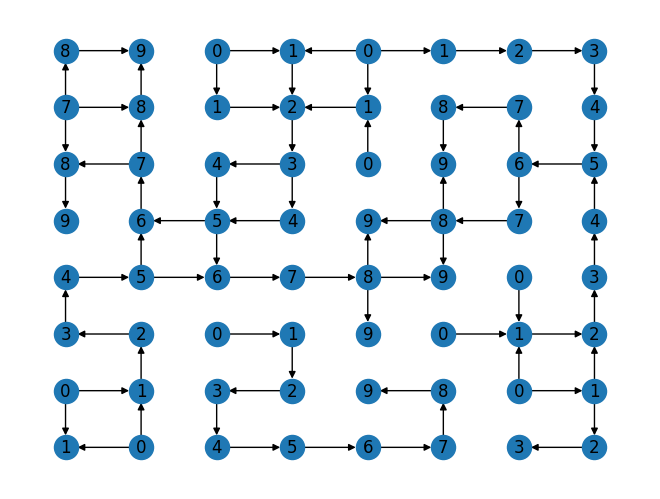

In [84]:
plot_graph(graph)

In [85]:
starting_nodes

{(0, 2), (0, 4), (2, 4), (4, 6), (5, 2), (5, 5), (6, 0), (6, 6), (7, 1)}

In [86]:
end_nodes


{(0, 1), (2, 5), (3, 0), (3, 4), (4, 5), (5, 4), (6, 4)}

In [92]:
def part_a(data):
    graph, starting_nodes, end_nodes = get_graph(data)
    
    
    nb_path = 0
    for start, end in tqdm(itertools.product(starting_nodes, end_nodes), total=len(starting_nodes)*len(end_nodes)):
        if manhattan_distance(start, end) > 9:
            continue
            
        nb_path += nx.has_path(graph, start, end)
            
    return nb_path

In [93]:
part_a(data_test)

  0%|          | 0/63 [00:00<?, ?it/s]

36

In [94]:
answer_a = part_a(puzzle.input_data)
answer_a

  0%|          | 0/56445 [00:00<?, ?it/s]

652

In [14]:
puzzle.answer_a = answer_a

That's the right answer!  You are one gold star closer to finding the Chief Historian. [Continue to Part Two]


## Part 2

In [95]:
def part_b(data):
    graph, starting_nodes, end_nodes = get_graph(data)
    nb_path = 0
    for start, end in tqdm(itertools.product(starting_nodes, end_nodes), total=len(starting_nodes)*len(end_nodes)):
        if manhattan_distance(start, end) > 9:
            continue
            
        try:
            paths = nx.all_simple_paths(graph, start, end, cutoff=9)
            nb_path += len(list(paths))
        except nx.NetworkXNoPath:
            pass
            
    return nb_path

In [96]:
answer_b = part_b(puzzle.input_data)
answer_b

  0%|          | 0/56445 [00:00<?, ?it/s]

1432

In [25]:
puzzle.answer_b = answer_b

That's the right answer!  You are one gold star closer to finding the Chief Historian.You have completed Day 10! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


# Day 11

In [2]:
puzzle = Puzzle(2024, 11)

In [3]:
data_test = "125 17"

In [4]:
class StoneA:
    def __init__(self, value, next_stone=None):
        self.value = value
        self.next_stone = next_stone

    def update(self):
        nb_digit = len(str(self.value))
        next_stone = self.next_stone
        
        if self.value == 0:
            self.value = 1
            
        elif nb_digit % 2 == 0:
            n1 = int(str(self.value)[:nb_digit//2])
            n2 = int(str(self.value)[nb_digit//2:])
            self.value = n1
            new_stone = self.__class__(n2, self.next_stone)
            self.next_stone = new_stone
            
        else:
            self.value *= 2024

        return next_stone


In [5]:
class StonesA:
    def __init__(self, data, nb_blink=25):
        self.data = data
        stones = [StoneA(number) for number in map(int, data.split(" "))]
        for s1, s2 in itertools.pairwise(stones):
            s1.next_stone = s2
            s2.previous_stone = s1
        self.head = stones[0]

        self.nb_blink = nb_blink

    def part_a(self, debug=False):
        for _ in tqdm(range(self.nb_blink)):
            stone = self.head
            while(stone):
                stone = stone.update()
            
            if debug:
                print(self.length)

        return self.length
    
    @property
    def length(self):
        stone = self.head
        nb_stone = 0
        while(stone):
            nb_stone += 1
            stone = stone.next_stone

        return nb_stone
            

## Part 1 

In [6]:
answer_a = StonesA(puzzle.input_data).part_a()
answer_a

  0%|          | 0/25 [00:00<?, ?it/s]

175006

In [7]:
puzzle.answer_a = answer_a

## Part 2

In [8]:
class StonesB:
    def __init__(self, data, nb_blink=75):
        self.data = data
        self.nb_blink = nb_blink
        self.stones = collections.Counter(map(int, data.split(" ")))


    def update(self, stone):
        nb_digit = len(str(stone))
        
        if stone == 0:
            return [1]
        elif nb_digit % 2 == 0:
            n1 = int(str(stone)[:nb_digit//2])
            n2 = int(str(stone)[nb_digit//2:])
            return [n1, n2            ]
        else:
            return [stone * 2024]
        
    def process(self):
        stones = self.stones
        
        for _ in range(self.nb_blink):
            new_stones = collections.Counter()
            for stone, val in stones.items():
                for new_stone in self.update(stone):
                    new_stones[new_stone] += val
                                      
            stones = new_stones
        
        return sum(stones.values())
            

In [9]:
StonesB(puzzle.input_data, nb_blink=25).process()

175006

In [10]:
answer_b = StonesB(puzzle.input_data, nb_blink=75).process()
answer_b

207961583799296

In [54]:
puzzle.answer_b = answer_b

That's the right answer!  You are one gold star closer to finding the Chief Historian.You have completed Day 11! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


# Day 12

In [2]:
puzzle = Puzzle(2024, 12)

In [24]:
data_test = """AAAA
BBCD
BBCC
EEEC"""

In [25]:
data_test2 = """EEEEE
EXXXX
EEEEE
EXXXX
EEEEE"""

In [26]:
data_test3 = """RRRRIICCFF
RRRRIICCCF
VVRRRCCFFF
VVRCCCJFFF
VVVVCJJCFE
VVIVCCJJEE
VVIIICJJEE
MIIIIIJJEE
MIIISIJEEE
MMMISSJEEE"""

In [40]:
def get_graph(data):
    data = np.array(list(map(list, data.split("\n"))))
    data = np.pad(data, ((1, 1), (1, 1)), "constant", constant_values=".")
    graph = nx.grid_2d_graph(*data.shape)

    
    for node, value in np.ndenumerate(data):
        graph.nodes[node]["value"] = value
    
    for n1, n2 in list(graph.edges):
        if graph.nodes[n1]["value"] == graph.nodes[n2]["value"]:
            graph[n1][n2]["inner"] = True
        else:
            graph[n1][n2]["inner"] = False
    
    return graph

In [41]:
def get_node_color(node_data):
    return (ord(node_data["value"]) - ord(".")) / (ord("Z") - ord("."))


In [95]:
def get_edge_color(graph, n1, n2, data):
    if graph.nodes[n1]["value"] == "." and graph.nodes[n2]["value"] == ".":
        return "white"
    if data["inner"]:
        return "blue"
    return "red"
    

In [96]:
def plot_graph(graph):
    pos = {(x, y):(y, -x) for x, y in graph.nodes}
    labels = nx.get_node_attributes(graph, 'value')
    edges_color = [get_edge_color(graph, *edge) for edge in graph.edges(data=True)]
    node_color = [get_node_color(data) for _, data in graph.nodes(data=True)]
    nx.draw(graph, labels=labels, node_color=node_color, edge_color=edges_color, pos=pos, with_labels=True)
    
    plt.show()

In [112]:
def get_fence_color(graph, fences, n1, n2, data):
    if data["inner"]:
        return "blue"
    for fence in fences:
        if n1 in set(fence) and n2 in set(fence):
            return "pink"
    return "white"
    

In [113]:
def plot_fence(graph, fences):
    pos = {(x, y):(y, -x) for x, y in graph.nodes}
    labels = nx.get_node_attributes(graph, 'value')
    edges_color = [get_fence_color(graph, fences, *edge)  for edge in graph.edges(data=True)]
    node_color = [get_node_color(data) for _, data in graph.nodes(data=True)]
    nx.draw(graph, labels=labels, node_color=node_color, edge_color=edges_color, pos=pos, with_labels=True)
    
    plt.show()

In [114]:
def get_sub_graph_view(graph):
    def filter_edge(n1, n2):
        return graph[n1][n2]["inner"]
        
    return nx.subgraph_view(graph, filter_edge=filter_edge)

## Part 1 

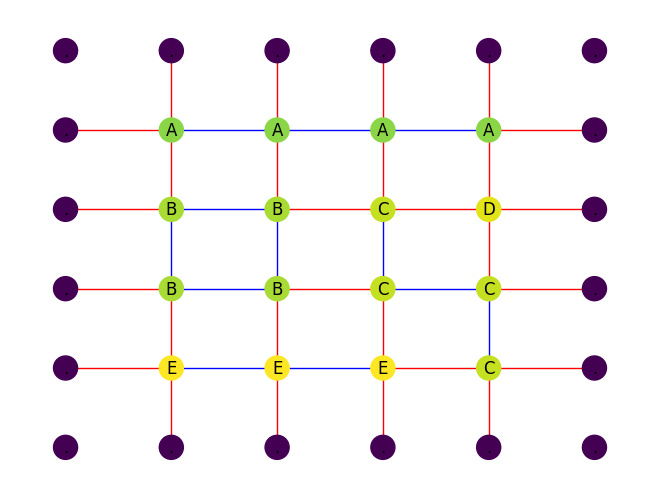

In [115]:
test_graph = get_graph(data_test)
plot_graph(test_graph)

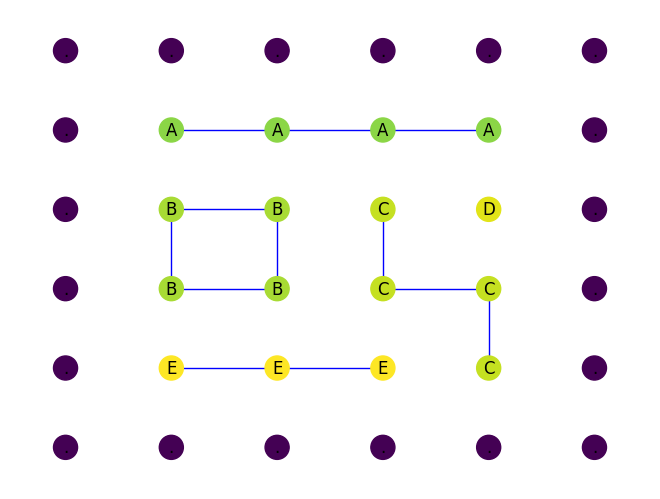

In [116]:
plot_graph(get_sub_graph_view(test_graph))

In [153]:
def part_a(data, debug=False):
    graph = get_graph(data)
    sub_graph = get_sub_graph_view(graph) 
    
    seen = set()
    fence_mapping = {}
    for node, data in graph.nodes(data=True):
        if data["value"] == "." or node in seen:
            continue
    
        nodes = set(nx.bfs_tree(sub_graph, node).nodes)
        seen.update(nodes)
        fences = set((node, neighbor) for node in nodes for neighbor in graph[node] if neighbor not in nodes)

        fence_mapping[frozenset(nodes)] = fences

        if debug:
            plot_fence(graph, fences)
            print(f"{graph.nodes[next(iter(nodes))]['value']} - size: {len(nodes)} / fence: {len(fences)}")
            
    
    return sum(len(k) * len(v) for k, v in fence_mapping.items())
    

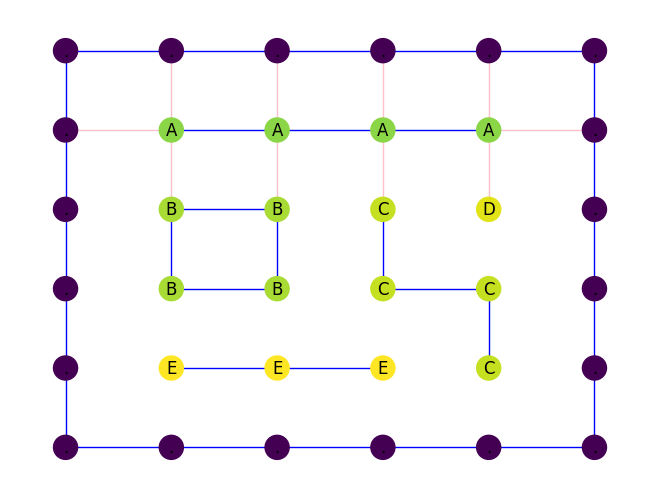

A - size: 4 / fence: 10


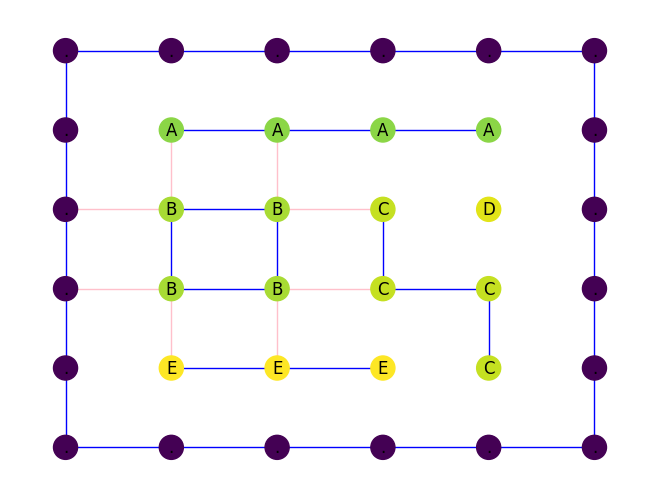

B - size: 4 / fence: 8


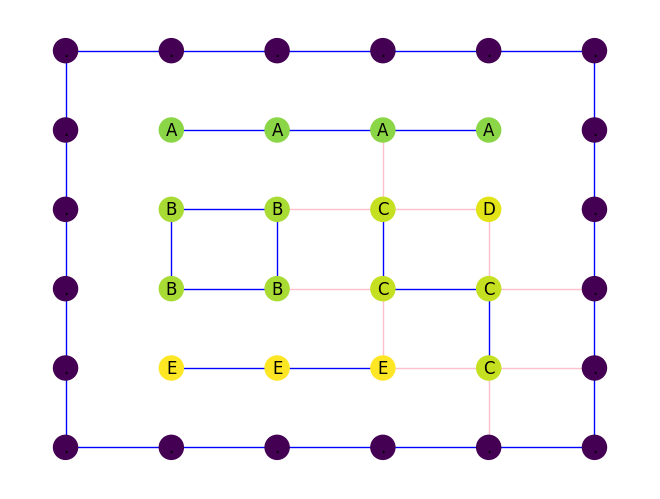

C - size: 4 / fence: 10


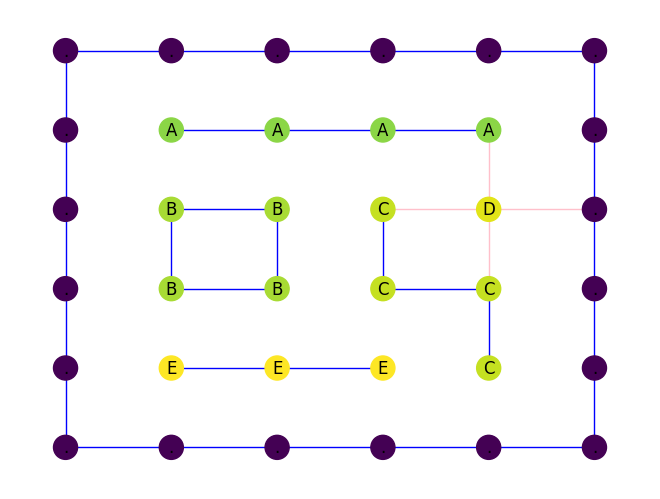

D - size: 1 / fence: 4


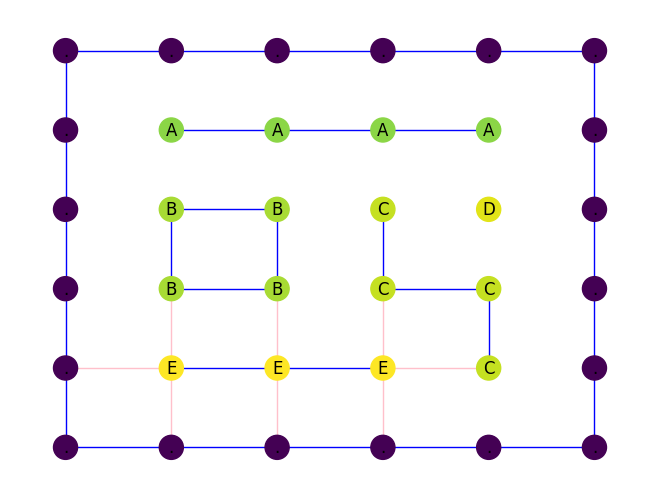

E - size: 3 / fence: 8


140

In [154]:
part_a(data_test, True)

In [155]:
part_a(data_test2)

692

In [156]:
answer_a = part_a(puzzle.input_data)
answer_a

1377008

In [121]:
puzzle.answer_a = answer_a

## Part 2

In [149]:
def part_b(data, debug=False):
    graph = get_graph(data)
    sub_graph = get_sub_graph_view(graph) 
    seen = set()
    fence_mapping = {}
    for node, data in graph.nodes(data=True):
        if data["value"] == "." or node in seen:
            continue
    
        nodes = set(nx.bfs_tree(sub_graph, node).nodes)
        seen.update(nodes)
        
        fences = set()
        all_edges = set()

        for node in sorted(nodes):
            for neighbor in graph[node]:
                if neighbor not in nodes:
                    all_edges.add((node, neighbor))
                    n_x, n_y = node
                    ng_x, ng_y = neighbor
                    
                    if (
                        n_x == ng_x
                        and ((n_x + 1, n_y), (ng_x + 1, ng_y)) not in all_edges 
                        and ((n_x - 1, n_y), (ng_x - 1, ng_y)) not in all_edges
                        or n_y == ng_y
                        and ((n_x, n_y + 1), (ng_x, ng_y + 1)) not in all_edges
                        and ((n_x, n_y - 1), (ng_x, ng_y - 1)) not in all_edges
                    ):
                        fences.add((node, neighbor))
                    

        
        if debug:
            plot_fence(graph, fences)
            print(f"{graph.nodes[next(iter(nodes))]['value']} - size: {len(nodes)} / fence: {len(fences)}")
        
        fence_mapping[frozenset(nodes)] = fences
    
    return sum(len(k) * len(v) for k, v in fence_mapping.items())
    

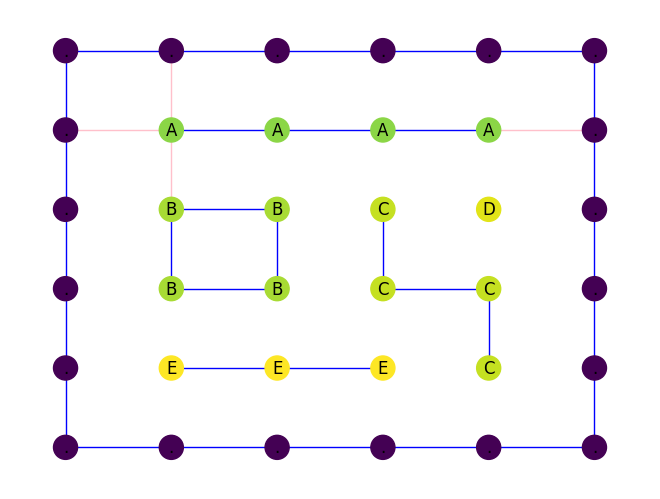

A - size: 4 / fence: 4


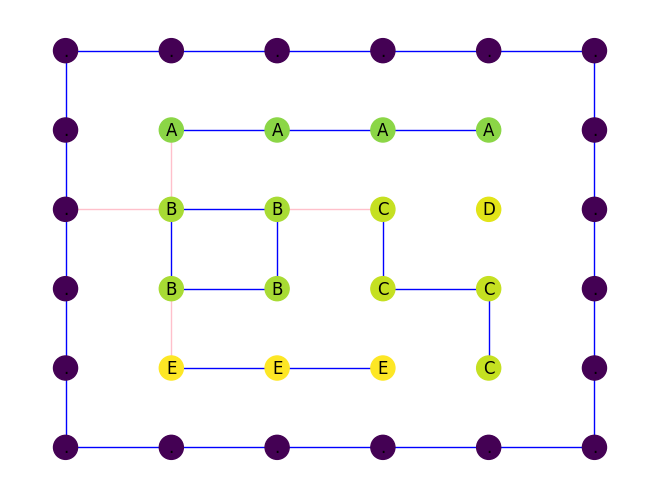

B - size: 4 / fence: 4


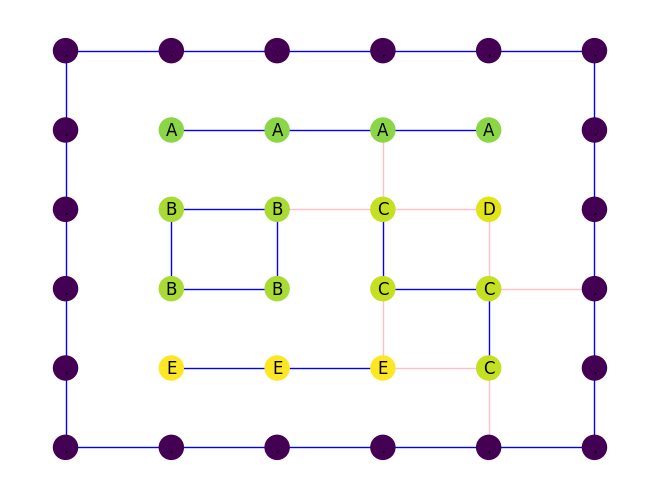

C - size: 4 / fence: 8


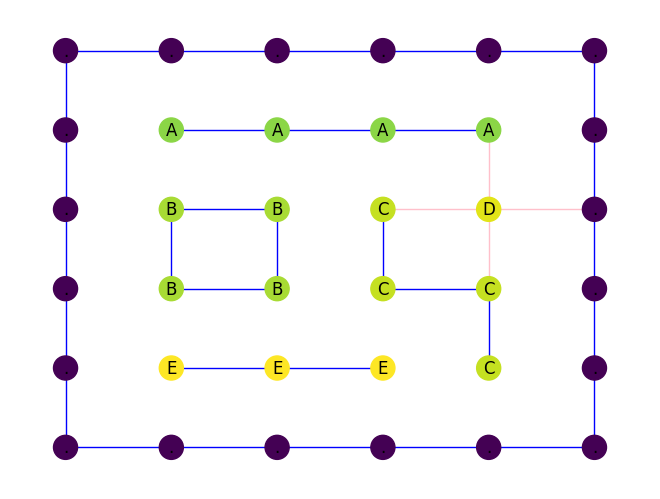

D - size: 1 / fence: 4


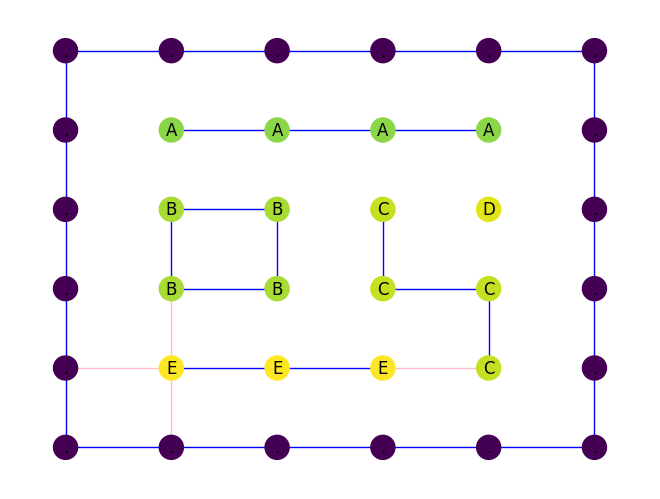

E - size: 3 / fence: 4


80

In [150]:
part_b(data_test, True)

In [ ]:
part_b(data_test2)

In [151]:
part_b(data_test3)

1206

In [147]:
answer_b = part_b(puzzle.input_data)
answer_b

815788

In [148]:
puzzle.answer_b = answer_b

That's the right answer!  You are one gold star closer to finding the Chief Historian.You have completed Day 12! You can [Shareon
  Bluesky
Twitter
Mastodon] this victory or [Return to Your Advent Calendar].


# Day 13

In [2]:
puzzle = Puzzle(2024, 13)

In [3]:
data_test = """Button A: X+94, Y+34
Button B: X+22, Y+67
Prize: X=8400, Y=5400

Button A: X+26, Y+66
Button B: X+67, Y+21
Prize: X=12748, Y=12176

Button A: X+17, Y+86
Button B: X+84, Y+37
Prize: X=7870, Y=6450

Button A: X+69, Y+23
Button B: X+27, Y+71
Prize: X=18641, Y=10279"""

In [4]:
regex_line = re.compile(r"Button A: X\+(?P<x1>\d+), Y\+(?P<y1>\d+)\nButton B: X\+(?P<x2>\d+), Y\+(?P<y2>\d+)\nPrize: X=(?P<xs>\d+), Y=(?P<ys>\d+)")
def parse_data(data):
    for lines in data.split("\n\n"):
        test = regex_line.match(lines)
        gd = test.groupdict()
        a = np.array([[gd["x1"], gd["x2"]], [gd["y1"], gd["y2"]]], dtype=int)
        b = np.array([gd["xs"], gd["ys"]], dtype=int)
        yield a, b


In [5]:
def compute(data, part="a"):
    total = 0
    for a, b in parse_data(data):
        if part == "b":
            b += 10000000000000

        x = np.linalg.solve(a, b)
        x = np.round(x).astype(int) # fucking float

        if all(a @ x == b) and (part == "a" and all(x <= 100) or part == "b"):
            res = x @ [3, 1]
            total += int(res)
            
    return total


In [99]:
def compute_scipy(data, part="a"):
    optimization = np.array([3, 1])
    total = 0
    for a, b in parse_data(data):
        if part == "a":
            bounds = [(0, 100), (0, 100)]
        else:
            b += 10000000000000
            bounds = [(0, None), (0, None)]

        res = sp.optimize.linprog([3, 1], A_eq=a, b_eq=b, bounds=bounds, method="highs", integrality=[1, 1])
            
        if res.success:
            total += int(res.fun)
            
    return total

## Part 1 

In [100]:
compute(data_test)

480

In [101]:
compute_scipy(data_test)

480

In [102]:
compute(puzzle.input_data)

29598

In [103]:
answer_a = compute_scipy(puzzle.input_data)
answer_a

29598

In [104]:
puzzle.answer_a = answer_a

## Part 2

In [105]:
compute(data_test, part="b")

875318608908

In [106]:
compute_scipy(data_test, part="b")

875318608908

In [111]:
answer_b = compute(puzzle.input_data, part="b")
answer_b 

93217456941970

In [110]:
compute_scipy(puzzle.input_data, part="b") # Marche pas flemme triste

66529641008973

In [112]:
puzzle.answer_b = answer_b

# Day 14

In [ ]:
puzzle = Puzzle(2022, 14)

In [ ]:
data = puzzle.input_data

In [ ]:
data_test = """498,4 -> 498,6 -> 496,6
503,4 -> 502,4 -> 502,9 -> 494,9"""

In [ ]:
sand_entry_x, send_entry_y = sand_entry = (500, 0)

In [ ]:
def get_cave_extremity(cave, p1=True):
    y_min = send_entry_y
    y_max = max(map(lambda t: t[1], cave)) + (0 if p1 else 2)
    x_min = min(map(lambda t: t[0], cave))
    x_max = max(map(lambda t: t[0], cave))
    
    return (x_min, x_max), (y_min, y_max)

In [ ]:
def init_cave(data, p1=True):
    coords = [[tuple(map(int, coord.split(","))) for coord in line.split(" -> ")] for line in data.split("\n")]
    cave = collections.defaultdict(str)

    def get_numbers_inside(n1, n2):
        return range(min(n1, n2), max(n1, n2) + 1)

    for coord in coords:

        for (x1, y1), (x2, y2) in itertools.pairwise(coord):
            if x1 == x2:
                for yi in get_numbers_inside(y1, y2):
                    cave[(x1, yi)] = "#"
            # y1 == y2
            else:
                for xi in get_numbers_inside(x1, x2):
                    cave[(xi, y1)] = "#"
                    
    if not p1:
        (x_min, x_max), (y_min, y_max) = get_cave_extremity(cave, p1=p1)
        boottom_half_lenght = y_max - y_min
        
        for xi in range(- boottom_half_lenght, boottom_half_lenght + 1):
            cave[(xi + sand_entry_x, y_max)] = "#"
        
    return cave



In [ ]:
np.set_printoptions(linewidth=150)
def print_cave(cave, p1=True):
    cave = dict(cave)
    (x_min, x_max), (y_min, y_max) = get_cave_extremity(cave, p1=p1)
    representation = np.chararray((x_max - x_min + 1, y_max - y_min + 1), unicode=True)
    representation[:, :] = "."
    for (x, y), value in cave.items():
        representation[x - x_min, y] = value
    representation[sand_entry_x - x_min, y_min] = "x"
    print(representation.T)

In [ ]:
cave_test = init_cave(data_test, p1=False)
print_cave(cave_test)

## Part 1

In [ ]:
def compute(data, p1=True):
    cave = init_cave(data, p1=p1)
    time = -1
    (x_min, x_max), (y_min, y_max) = get_cave_extremity(cave, p1=p1)
    while True:
        time += 1
        sand_pos_x, sand_pos_y = sand_entry
        
        if cave[sand_entry] == "o":
            return cave, time - 1
        
        while True:
            under = (sand_pos_x, sand_pos_y + 1)

            match cave[under]:
                case "#" | "o":
                    under_left  = (sand_pos_x - 1, sand_pos_y + 1)
                    under_right = (sand_pos_x + 1, sand_pos_y + 1)

                    if cave[under_left] == "":
                        sand_pos_x, sand_pos_y = under_left
                    elif cave[under_right] == "":
                        sand_pos_x, sand_pos_y = under_right
                    else:
                        cave[(sand_pos_x, sand_pos_y)] = "o"
                        break
                case "":
                    sand_pos_x, sand_pos_y = under

            if sand_pos_y == y_max:
                return cave, time

In [ ]:
cave, time = compute(data_test)
print(f"{time=}")
print_cave(cave)

In [ ]:
_, answer_a = compute(data)
answer_a

In [ ]:
puzzle.answer_a = answer_a

## Part 2

In [ ]:
cave, time = compute(data_test, p1=False)
print(f"{time=}")
print_cave(cave, p1=False)

In [ ]:
_, answer_b = compute(data, p1=False)
answer_b

In [ ]:
puzzle.answer_b = answer_b

# Day 15

In [ ]:
puzzle = Puzzle(2022, 15)

In [ ]:
data = puzzle.input_data

In [ ]:
data_test = """Sensor at x=2, y=18: closest beacon is at x=-2, y=15
Sensor at x=9, y=16: closest beacon is at x=10, y=16
Sensor at x=13, y=2: closest beacon is at x=15, y=3
Sensor at x=12, y=14: closest beacon is at x=10, y=16
Sensor at x=10, y=20: closest beacon is at x=10, y=16
Sensor at x=14, y=17: closest beacon is at x=10, y=16
Sensor at x=8, y=7: closest beacon is at x=2, y=10
Sensor at x=2, y=0: closest beacon is at x=2, y=10
Sensor at x=0, y=11: closest beacon is at x=2, y=10
Sensor at x=20, y=14: closest beacon is at x=25, y=17
Sensor at x=17, y=20: closest beacon is at x=21, y=22
Sensor at x=16, y=7: closest beacon is at x=15, y=3
Sensor at x=14, y=3: closest beacon is at x=15, y=3
Sensor at x=20, y=1: closest beacon is at x=15, y=3"""

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    @property
    def as_tuple(self):
        return self.x, self.y
    
    @classmethod
    def from_tuple(cls, coord):
        return Point(*coord)
      
    def manathan_distance(self, other_point):
        return abs(self.x - other_point.x) + abs(self.y - other_point.y)
    
    def det(self, point):
        return self.x * point.y - self.y * point.x
    
    def __sub__(self, other_point):
        return Point(self.x - other_point.x, self.y - other_point.y)
    
    def __isub__(self, other_point):
        return self - other_point
    
    def __neg__(self):
        return Point(-self.x, -self.y)
    
    def __add__(self, other):
        return Point(self.x + other.x, self.y + other.y)
    
    def __iadd__(self, other_point):
        return self + other_point
    
    def __str__(self):
        return f"({self.x}, {self.y})"
    
    def __repr__(self):
        return f"Point{self}"
    
class Line:
    def __init__(self, p1, p2):
        self.p1 = p1
        self.p2 = p2
        
    def det(self):
        return self.p1.det(self.p2)
    
    def intersection(self, line):
        xdiff = Point(self.p1.x - self.p2.x, line.p1.x - line.p2.x)
        ydiff = Point(self.p1.y - self.p2.y, line.p1.y - line.p2.y)
        
        div = xdiff.det(ydiff)
        if div == 0:
            return False
        
        d = Point(self.det(), line.det())
        x = d.det(xdiff) // div
        y = d.det(ydiff) // div
        
        return Point(x, y)

class Sensor:
    def __init__(self, sensor, beacon):
        self.sensor = sensor
        self.beacon = beacon
        self.distance = sensor.manathan_distance(beacon)
        self.outer_distance = self.distance + 1
        self.lines = self.possible_outer_lines()

        
    def possible_outer_points(self):
        x, y = self.sensor.as_tuple
        return [
            Point(x - self.outer_distance, y),
            Point(x, y - self.outer_distance),
            Point(x + self.outer_distance, y),
            Point(x, y + self.outer_distance)
        ]
    
    def possible_outer_lines(self):
        points_i = self.possible_outer_points()
        points_j = points_i[1:] + [points_i[0]]
        
        return [Line(pi, pj) for (pi, pj) in zip(points_i, points_j)]
            
    def point_possible(self, point):
        return self.sensor.manathan_distance(point) > self.distance
    
    def outer_intersections_sensor(self, other_sensor, start, end):
        for line_i in self.lines:
            for line_j in other_sensor.lines:
                if (intersection := line_i.intersection(line_j)):
                    if start <= intersection.x <= end and start <= intersection.y <= end:
                        yield intersection       

In [ ]:
number_pattern = re.compile("-?\d+")
def parse_data(data):
    sensors_beacons = []
    for line in data.split("\n"):
        s_x, s_y, b_x, b_y = map(lambda match: int(match.group()), number_pattern.finditer(line))
        sensor, beacon = Point(s_x, s_y), Point(b_x, b_y)
        sensors_beacons.append((sensor, beacon, sensor.manathan_distance(beacon)))
        
    return sensors_beacons

In [ ]:
number_pattern = re.compile("-?\d+")
def parse_data2(data):
    sensors = []
    for line in data.split("\n"):
        s_x, s_y, b_x, b_y = map(lambda match: int(match.group()), number_pattern.finditer(line))
        sensor, beacon = Point(s_x, s_y), Point(b_x, b_y)
        sensors.append(Sensor(sensor, beacon))
    return sensors

## Part 1

In [ ]:
def span(sensor, beacon, m_s_b, y):
    """
    find x
    sensor.manathan(x, y) = sensor.manathan(beacon)
    abs(sx - x) + abs(sy - y) = sensor.manathan(beacon)
    abs(sx - x) = sensor.manathan(beacon) - abs(sy - y) = z avec z < 0
    sx - x = z AND sx - x = -z
    x = sx -z and x = sx + z
    """
    z = m_s_b - abs(sensor.y - y)
    if z < 0:
        return range(0)
    
    x1, x2 = sensor.x - z, sensor.x + z 
    
    return range(min(x1, x2), max(x1, x2) + 1)

def span_2(sensor, beacon, m_s_b, y):
    """
    find x
    sensor.manathan(x, y) = sensor.manathan(beacon)
    abs(sx - x) + abs(sy - y) = sensor.manathan(beacon)
    abs(sx - x) = sensor.manathan(beacon) - abs(sy - y) = z avec z < 0
    sx - x = z AND sx - x = -z
    x = sx -z and x = sx + z
    """
    z = m_s_b - abs(sensor.y - y)
    if z < 0:
        return False
    
    x1, x2 = sensor.x - z, sensor.x + z 
    
    return [min(x1, x2), max(x1, x2)]

In [ ]:
def part_1_2(data, y):
    line_y = []
    b_s = set()
    for sensor, beacon, m_s_b in parse_data(data):
        if sensor.y == y:
            b_s.add(sensor.x)
        if beacon.y == y:
            b_s.add(beacon.x)
        if (r := span_2(sensor, beacon, m_s_b, y)):
            line_y.append(r)
            
    
    line_y.sort(key=lambda interval: interval[0])
    merged = [line_y[0]]
    for current in line_y:
        previous = merged[-1]
        if current[0] <= previous[1]:
            previous[1] = max(previous[1], current[1])
        else:
            merged.append(current)
            
    return sum(r_e - r_s + 1 for r_s, r_e in merged) - sum(r_s <= s <= r_e for r_s, r_e in merged for s in b_s)


In [ ]:
def part_1_1(data, y):
    line_y = set()
    b_s = set()
    for sensor, beacon, m_s_b in parse_data(data):
        if sensor.y == y:
            b_s.add(sensor.x)
        if beacon.y == y:
            b_s.add(beacon.x)
        line_y |= set(span(sensor, beacon, m_s_b, y))
    line_y -= b_s
    return len(line_y)

In [ ]:
part_1_2(data_test, 10)

In [ ]:
part_1_1(data_test, 10)

In [ ]:
part_1_1(data, 2000000) == part_1_2(data, 2000000)

In [ ]:
%%timeit
part_1_1(data, 2000000)

In [ ]:
%%timeit
part_1_2(data, 2000000)

In [ ]:
answer_a = part_1_2(data, 2000000)
puzzle.answer_a = answer_a

## Part 2

In [ ]:
def find_outer_points(sensor, m_s_b):
    outer_distance = m_s_b + 1
    sx, sy = sensor.as_tuple
    outers = []
    for i in range(outer_distance):
        yield Point(sx - outer_distance + i, sy + i)
        yield Point(sx - outer_distance + i, sy - i)
        yield Point(sx + i, sy + outer_distance - i)
        yield Point(sx - i, sy + outer_distance - i)

In [ ]:
def all_possible_point(sensors_beacons, start, end):
    for sensor, _, m_s_b in sensors_beacons:
        for point in find_outer_points(sensor, m_s_b):
            if start <= point.x <= end and start <= point.y <= end:
                yield point
                
def compute(data, start=0, end=20):
    sensors_beacons = parse_data(data)
    
    for point in tqdm.tqdm(all_possible_point(sensors_beacons, start, end)):
        for sensor, _, m_s_b in sensors_beacons:
            if sensor.manathan_distance(point) <= m_s_b:
                break
        else:
            print(point)
            return point

In [ ]:
compute(data_test, 0, 20)

In [ ]:
res = compute(data, 0, 4000000)

In [ ]:
answer_b = res.x*4000000 + res.y
answer_b

In [ ]:
puzzle.answer_b = answer_b

In [ ]:
def all_possible_point_with_line(sensors, start, end):
    for si, sj in itertools.combinations(sensors, 2):
        yield from si.outer_intersections_sensor(sj, start, end)

In [ ]:
def compute2(data, start=0, end=4000000):
    sensors = parse_data2(data)
    for point in all_possible_point_with_line(sensors, start, end):
        for sensor in sensors:
            if not sensor.point_possible(point):
                break
        else:
            return point

In [ ]:
compute2(data_test, 0, 20)

In [ ]:
%%timeit
res2 = compute2(data, 0, 4000000)

In [ ]:
res2 = compute2(data, 0, 4000000)
answer_b_2 = res2.x*4000000 + res2.y

In [ ]:
answer_b_2 == answer_b